In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
try:
    data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)
except IOError:
    print("Error: 没有找到文件或读取文件失败")
else:
    print("内容写入文件成功")

内容写入文件成功


In [6]:
data.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
            'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
            'stalk-surface-below-ring',
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
            'spore-print-color', 'population', 'habitat']

In [7]:
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
class Dataprint:
    def __init__(self,data):
        print(data)
Dataprint(data)

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

In [7]:
from sklearn import preprocessing

# 初始化编码器
le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
data.head()
data.to_csv('Preprocessing_Mushroom.csv')

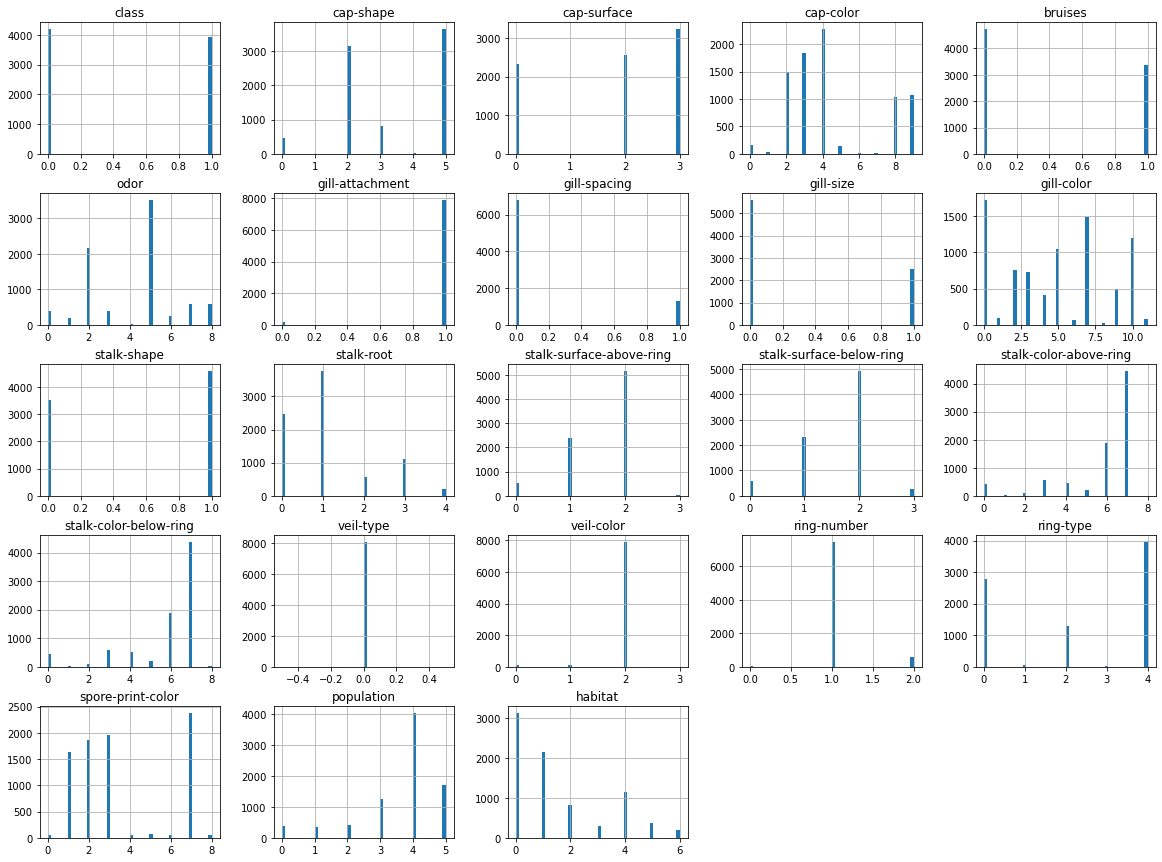

In [30]:
result_plot = data.hist(bins=50, figsize=(20, 15))

In [31]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:]
y = data.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True,
                                                    random_state=2019
                                                    )
print(x_train.shape)
print(x_test.shape)
print(y[:5])

(5686, 22)
(2438, 22)
0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64


<AxesSubplot:title={'center':'Mushroom feature Heatmap'}>

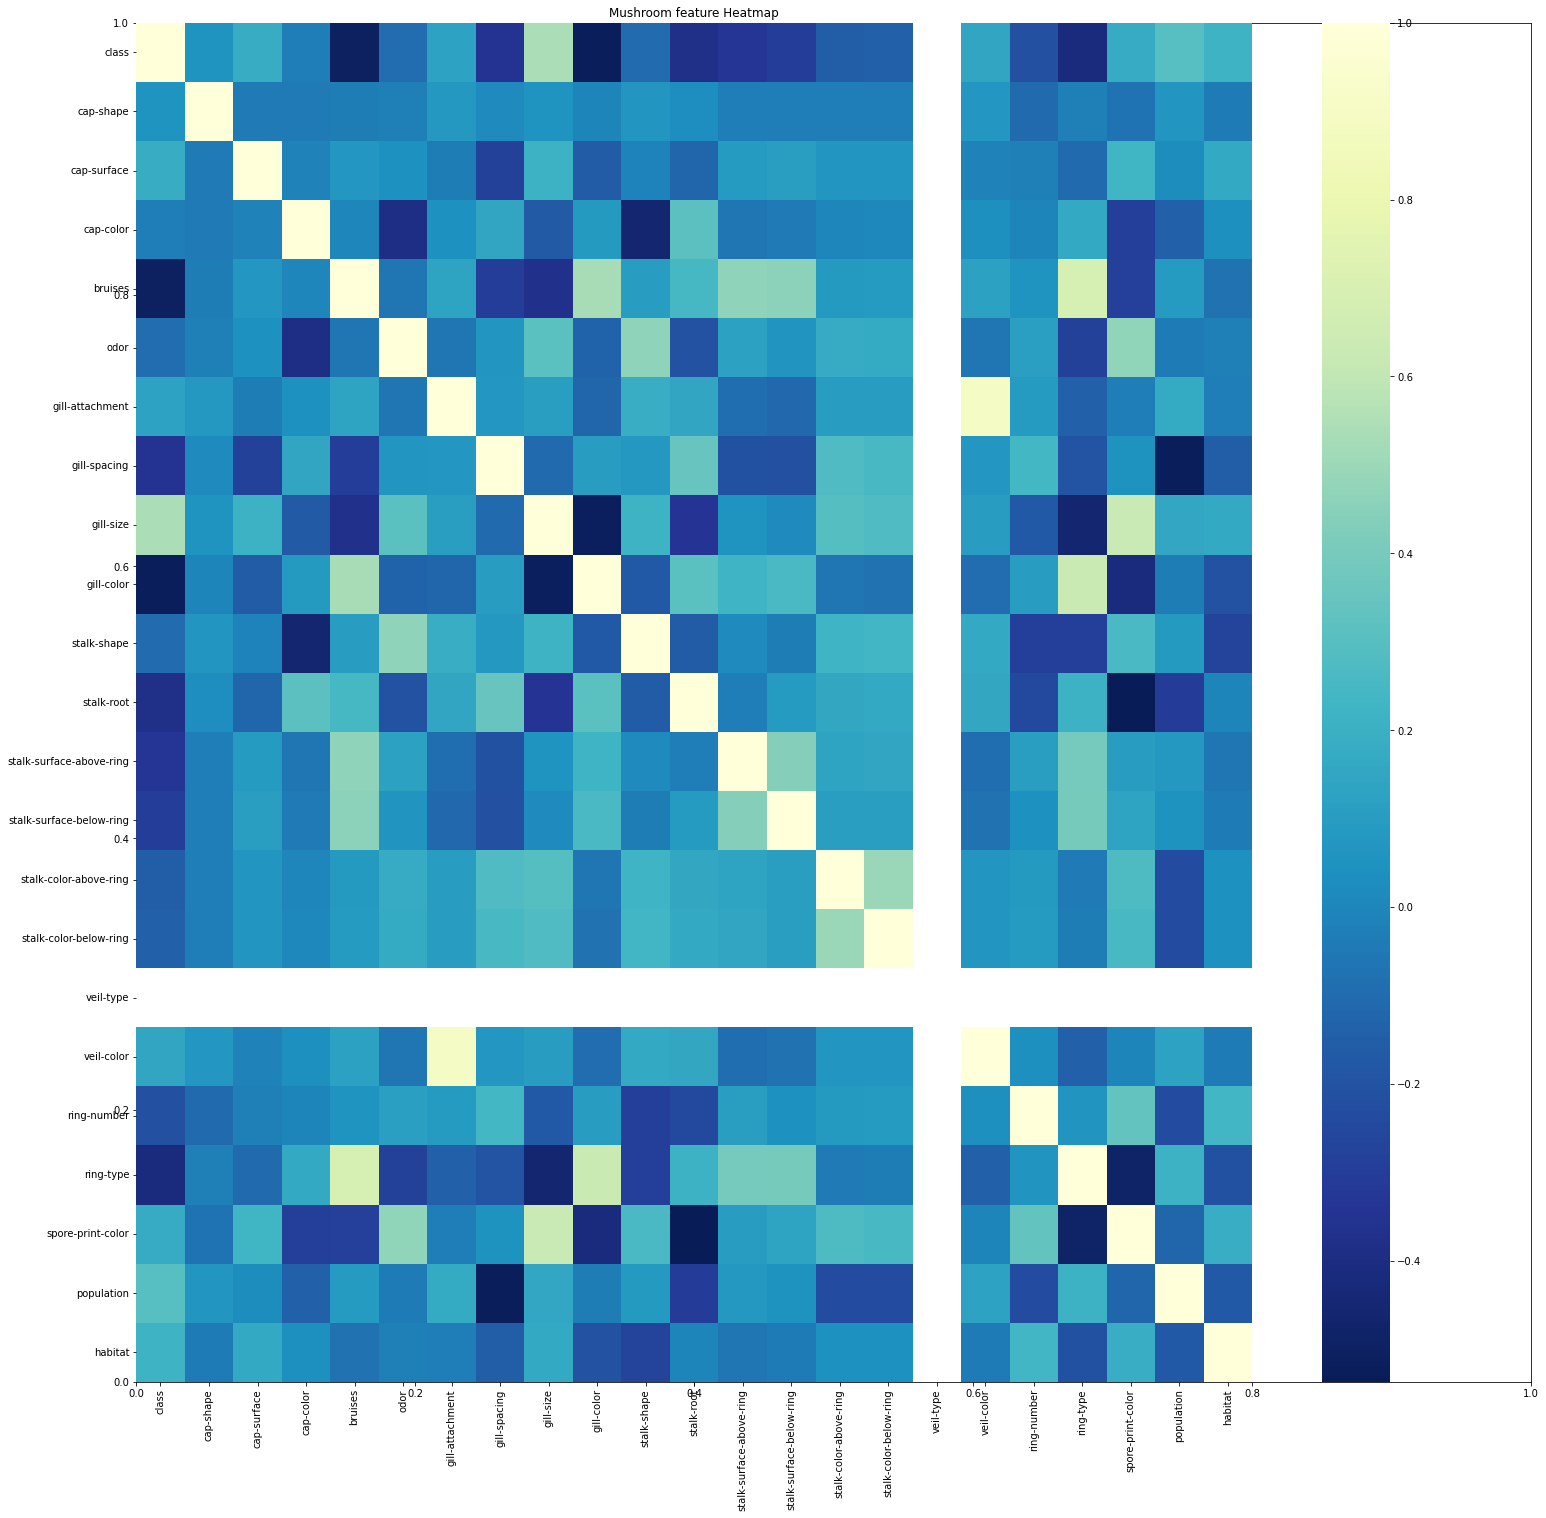

In [32]:
import seaborn as sns
plt.subplots(figsize=(25,25))
ax = plt.axes()
ax.set_title("Mushroom feature Heatmap")
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="YlGnBu_r")


In [53]:
pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [33]:
model, train_score, test_score = [], [], []

In [34]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()  # 初始化
lr.fit(x_train, y_train)  # 训练
y_pred_lr = lr.predict(x_test)  # 预测

# 性能评估
print('>>>在训练集上的表现：', lr.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_lr))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_lr))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_lr))

model.append(str(lr).split('(')[0])
train_score.append(lr.score(x_train, y_train))
test_score.append(metrics.accuracy_score(y_test, y_pred_lr))

>>>在训练集上的表现： 0.9537460429124165

>>>在测试集上的表现： 0.9417555373256767

>>>混淆矩阵
 [[1197   64]
 [  78 1099]]

>>>分类评价函数
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1261
           1       0.94      0.93      0.94      1177

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>>>特征权重值
 [0.         0.00345743 0.         0.         0.         0.
 0.         0.11659675 0.34323597 0.02497087 0.05831238 0.
 0.00155069 0.01901061 0.01150023 0.         0.         0.00207471
 0.00336203 0.20861252 0.19396491 0.01335088]

>>>索引降序排列
 [ 8 19 20  7 10  9 13 21 14  1 18 17 12 11 15 16  6  5  4  3  2  0]

>>>特征名
 ['gill-color', 'spore-print-color', 'population', 'gill-size', 'stalk-root', 'stalk-shape', 'stalk-color-above-ring', 'habitat', 'stalk-color-below-ring', 'cap-surface', 'ring-type', 'ring-number', 'stalk-surface-below-ring', 'stalk-surface-above-ring', 'veil-type', 'veil-color', 'gill-spacing', 'gill-attachment', 'odor', 'bruises', 'cap-color', 'cap-shape']


Text(0.5, 1.0, 'Feature Weights')

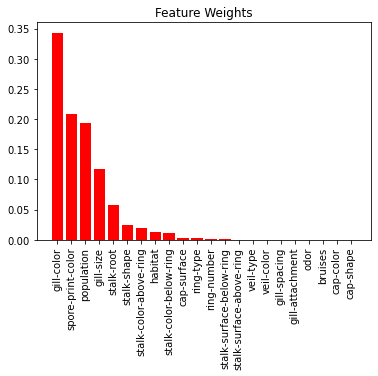

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()  # 初始化
dtc.fit(x_train, y_train)  # 训练

# 获取特征权重值
weights = dtc.feature_importances_
print('>>>特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [data.iloc[:, 1:].columns[i] for i in sort_index]
print('\n>>>索引降序排列\n', sort_index)
print('\n>>>特征名\n', name)

# 可视化
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')

In [37]:
from sklearn.decomposition import PCA

# ---------------------------------------------
# 最佳主成分数量
pca = PCA(n_components=None)
pca.fit_transform(x_train)
var_values = pca.explained_variance_ratio_

def select_best_components(var_, goal_var):
    best_components, total_var = 0, 0.0  # 初始化
    for var in var_:
        total_var += var
        best_components += 1
        if total_var >= goal_var:  # 达到目标方差，终止整个循环
            break
    return best_components
n = select_best_components(var_=var_values, goal_var=0.95)
print('\n>>>最好的特征数量为 %d 个'% n)

# ---------------------------------------------
# 根据上面的最佳 n_components 数量，进行降维
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

# --------------------------------------------
# PCA + LogisticRegression 训练和预测
lr = LogisticRegression()  # 初始化
lr.fit(x_train_pca, y_train)  # 训练
y_pred_pca_lr = lr.predict(x_test_pca)  # 预测

# 性能评估
print('\n>>>在训练集上的表现：', lr.score(x_train_pca, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_pca_lr))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_pca_lr))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_pca_lr))

model.append(str(lr).split('(')[0] +'--'+ str(pca).split('(')[0])
train_score.append(lr.score(x_train_pca, y_train))
test_score.append(metrics.accuracy_score(y_test, y_pred_pca_lr))


>>>最好的特征数量为 10 个

>>>在训练集上的表现： 0.826239887442842

>>>在测试集上的表现： 0.8244462674323215

>>>混淆矩阵
 [[1077  184]
 [ 244  933]]

>>>分类评价函数
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1261
           1       0.84      0.79      0.81      1177

    accuracy                           0.82      2438
   macro avg       0.83      0.82      0.82      2438
weighted avg       0.82      0.82      0.82      2438



In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.logspace(0, 4, 10),  # 创建正则化超参数空间
          'penalty': ['l1', 'l2']      # l1 l2 正则化函数
}
grid = GridSearchCV(lr, params, cv=5)
grid.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [42]:
print(grid.best_score_)
print(grid.best_estimator_.get_params()['C'])
print(grid.best_estimator_.get_params()['penalty'])

0.9639465308917341
10000.0
l2


In [43]:
y_pred_grid = grid.predict(x_test)
print('\n>>>在训练集上的表现：', grid.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_grid))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_grid))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_grid))

model.append(str(lr).split('(')[0] +'--'+ str(grid).split('(')[0])
train_score.append(grid.score(x_train, y_train))
test_score.append(metrics.accuracy_score(y_test, y_pred_grid))


>>>在训练集上的表现： 0.963770664790714

>>>在测试集上的表现： 0.9491386382280558

>>>混淆矩阵
 [[1198   63]
 [  61 1116]]

>>>分类评价函数
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1261
           1       0.95      0.95      0.95      1177

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [54]:
### 凋整参数
### 确定 n_estimators
import xgboost as xgb
### 查看初始参数时的准确率
xgb_model_0 = xgb.XGBClassifier(
    learning_rate=0.1, 
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    ##"nthread=4,
    scale_pos_weight=1, 
    seed=0,
    nthread=-1
)

xgb_model_0.fit(x_train, y_train)

auc = accuracy_score(y_test, xgb_model_0.predict(x_test))
print("accuracy_score:"+str(auc))

dtrain = xgb.DMatrix(x_train, label=y_train)
xgb_cv = xgb.cv(params=xgb_model_0.get_params(), dtrain=dtrain, num_boost_round=1000, early_stopping_rounds=50, metrics="auc", nfold=5, show_stdv=False)
print(xgb_cv)

accuracy_score:1.0
[15:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[15:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[15:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[15:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[15:54:03] WARNING: C:/buildkite-agent/bu

ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'D:\\anaconda\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



In [55]:
### 调整max_depth与min_child_weight

xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    gamma= 0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    ##"nthread=4,
    scale_pos_weight=1,
    n_estimators=xgb_cv.shape[0], 
    seed=0,
    nthread=-1
)

xgb_params = {
    "max_depth":range(3, 10, 2),
    "min_child_weight":range(1, 6, 2),
}

grid = GridSearchCV(xgb_model, param_grid=xgb_params, cv=5, scoring='roc_auc')
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=23, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [56]:
print(grid.best_params_)
test_predict1 = grid.predict(x_test)

print("accuracy_score:"+str(accuracy_score(y_test, test_predict1)))

{'max_depth': 5, 'min_child_weight': 1}
accuracy_score:0.9987694831829368


In [57]:
### 进一步调整max_Depth与min_child_weight，进行微调

xgb_params2 = {
    "max_depth":range(4, 5, 6),
    "min_child_weight":range(1, 2),
}

grid2 = GridSearchCV(xgb_model, param_grid=xgb_params2, cv=5, scoring='roc_auc')
grid2.fit(x_train, y_train)

print(grid2.best_params_)
test_predict2 = grid2.predict(x_test)

print("accuracy_score:"+str(accuracy_score(y_test, test_predict2)))           # 在测试集上的准确率出现下滑，则不进行参数改变

{'max_depth': 4, 'min_child_weight': 1}
accuracy_score:0.9913863822805579


In [58]:
### 调整完毕max_depth与min_child_weight后再次进行n_estimators的调整

dtrain = xgb.DMatrix(x_train, label=y_train)
xgb_cv = xgb.cv(params=grid.best_estimator_.get_params(), dtrain=dtrain, num_boost_round=1000, early_stopping_rounds=50, metrics="auc", nfold=5, show_stdv=False)
print(xgb_cv.shape[0])

[10:10:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[10:10:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[10:10:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[10:10:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

[10:10:56] WARNING: C:/buildkite-agent/builds/buildkite-wind

In [59]:
### 改变subsample与colsample_bytree

xgb_model2 = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1, 
    gamma= 0,
    objective='binary:logistic',
    ##"nthread=4,
    scale_pos_weight=1,
    n_estimators=xgb_cv.shape[0], 
    seed=0,
    nthread=-1
)

xgb_params3 = {
    "subsample":np.arange(0.3, 1, 0.1),
    "colsample_bytree":np.arange(0.3, 1, 0.1)
}

grid3 = GridSearchCV(xgb_model2, param_grid=xgb_params3, cv=5)
grid3.fit(x_train, y_train)

print(grid3.best_params_)
test_predict3 = grid3.predict(x_test)

print("accuracy_score:"+str(accuracy_score(y_test, test_predict3)))   

{'colsample_bytree': 0.5, 'subsample': 0.9000000000000001}
accuracy_score:0.9987694831829368


In [60]:
### 进一步微调改变subsample与colsample_bytree

xgb_params4 = {
    "subsample":np.arange(0.8, 1, 0.05),
    "colsample_bytree":np.arange(0.5, 0.6, 0.05)
}

grid4 = GridSearchCV(xgb_model2, param_grid=xgb_params4, cv=5)
grid4.fit(x_train, y_train)

print(grid4.best_params_)
test_predict4 = grid4.predict(x_test)

print("accuracy_score:"+str(accuracy_score(y_test, test_predict4))) 

{'colsample_bytree': 0.5, 'subsample': 0.9000000000000001}
accuracy_score:0.9987694831829368


In [61]:
from sklearn.svm import SVC
svm_model = SVC()

tuned_parameters = {
    'C': [1, 10, 100,500, 1000],
    'kernel': ['linear','rbf'],
    'C': [1, 10, 100,500, 1000], 
    'gamma': [1,0.1,0.01,0.001, 0.0001], 
    'kernel': ['rbf']
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# 建立随机搜索模型
model_svm = RandomizedSearchCV(
    svm_model,  # 待搜索模型
    tuned_parameters,  # 参数
    cv=10,  # 10折交叉验证
    scoring="accuracy",  # 评分标准
    n_iter=20  # 迭代次数
    )

# 训练模型
model_svm.fit(x_train,y_train)

RandomizedSearchCV(cv=10, 
                   estimator=SVC(), 
                   n_iter=20,
                   param_distributions={'C': [1, 10, 100, 500, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='accuracy')

# 最佳得分效果
print(model_svm.best_score_)
#1.0

1.0


1.0

In [64]:
# 预测
y_pred = model_svm.predict(x_test)
1
# 预测值和原始标签值计算：分类准确率
metrics.accuracy_score(y_pred, y_test)

1.0

Text(0.5, 0, 'False Positive Rate')

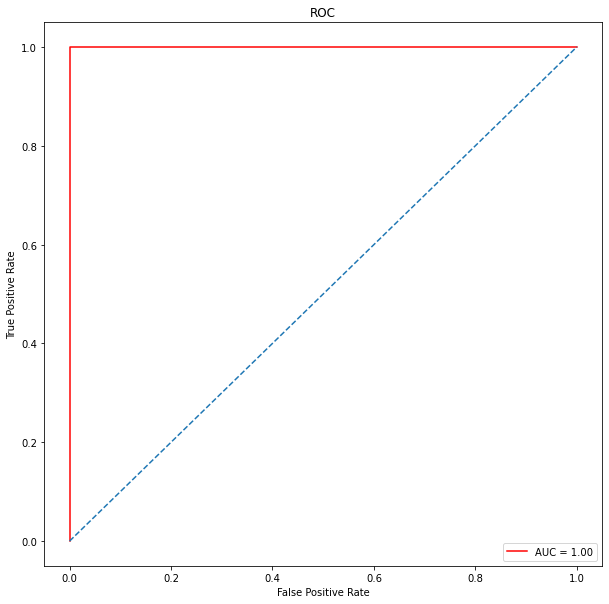

In [65]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('ROC')

plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')